# Data Cleaning
Andres Oats Garcia

In [142]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from plotnine import *


In [100]:
#importing the data from the excel files
spain_data = pd.read_excel("Spain_Data.xlsx")
us_data = pd.read_excel("US_data.xlsx")

In [101]:
#converting the Spain data to have columns as variables
spain_data = spain_data.transpose()

#cleaning the column names
spain_data = spain_data.rename(columns={0:"Spain Economic Activity, Industrial production (Index)", 1: "Spain, Exchange rates relative to the US dollar", 2:"Spain, International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)", 3:"Spain, Consumer prices (All items)"})
spain_data = spain_data.reset_index()
spain_data = spain_data.drop(0)

spain_data.head(10)

,index,"Spain Economic Activity, Industrial production (Index)","Spain, Exchange rates relative to the US dollar","Spain, International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)","Spain, Consumer prices (All items)"
1,Jan 1960,NaN,0.016667,233.0,2.857368
2,Feb 1960,NaN,0.016667,253.0,2.855049
3,Mar 1960,NaN,0.016667,299.0,2.851573
4,Apr 1960,NaN,0.016667,326.0,2.853891
5,May 1960,NaN,0.016667,360.0,2.845198
...,...,...,...,...,...
368,Aug 1990,57.138375,0.010306,53227.717281,52.200576
369,Sep 1990,97.803577,0.010156,53790.187718,52.750025
370,Oct 1990,100.909947,0.01045,55428.040577,53.218335
371,Nov 1990,104.110449,0.010643,56347.862332,53.165017


In [102]:
#similarly for US data, so that columns are variables
us_data = us_data.transpose()

#cleaning the column names
us_data = us_data.rename(columns={0:"US, International Reserves", 1:"US, Consumer Prices, All Items"})
us_data = us_data.reset_index()
us_data = us_data.drop(0)

us_data.head(10)

,index,"US, International Reserves","US, Consumer Prices, All Items"
1,Jan 1960,21478.1,13.436946
2,Feb 1960,21395.7,13.482806
3,Mar 1960,21344.7,13.482806
4,Apr 1960,21278.0,13.528666
5,May 1960,21234.3,13.528666
...,...,...,...
368,Aug 1990,78908.838357,60.351608
369,Sep 1990,80024.166133,60.856066
370,Oct 1990,82852.196532,61.222946
371,Nov 1990,83059.402774,61.360525


In [103]:
#merging the two data sets
combined_df = spain_data.merge(us_data, on="index")
combined_df.head(10)

,index,"Spain Economic Activity, Industrial production (Index)","Spain, Exchange rates relative to the US dollar","Spain, International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)","Spain, Consumer prices (All items)","US, International Reserves","US, Consumer Prices, All Items"
0,Jan 1960,NaN,0.016667,233.0,2.857368,21478.1,13.436946
1,Feb 1960,NaN,0.016667,253.0,2.855049,21395.7,13.482806
2,Mar 1960,NaN,0.016667,299.0,2.851573,21344.7,13.482806
3,Apr 1960,NaN,0.016667,326.0,2.853891,21278.0,13.528666
4,May 1960,NaN,0.016667,360.0,2.845198,21234.3,13.528666
...,...,...,...,...,...,...,...
367,Aug 1990,57.138375,0.010306,53227.717281,52.200576,78908.838357,60.351608
368,Sep 1990,97.803577,0.010156,53790.187718,52.750025,80024.166133,60.856066
369,Oct 1990,100.909947,0.01045,55428.040577,53.218335,82852.196532,61.222946
370,Nov 1990,104.110449,0.010643,56347.862332,53.165017,83059.402774,61.360525


## Defining variables
We now construct the following variables for Spain: \
(i) The log exchange rate \
(ii) The difference in the log exchange rate versus the previous month \
(iii) The monthly inflation rate \
(iv) Log industrial production \
(v) Monthly growth in industrial production -- for this variable, I have calculated the difference in log values, which is approximately equal to the percentage change\
(vi) Growth in industrial production versus 12 months ago (i.e. January 1971 versus January 1970 etc.) -- percentage change \
(vii) An index of the value of international reserves (value of reserves at January 1960 = 100) \
\
and for the U:S \
(i) The monthly inflation rate \
(ii) An index of the value of international reserves (value of reserves at January 1960 = 100) \

We can define some functions and use lambda mappings to create these new variables. I create a new dataframe for these variables


In [131]:
#new dataframe for the new variables
analysis_df = pd.DataFrame()

#adding the years to the new data frame
analysis_df['Year'] = combined_df['index']

#calculating the log exchange rate  using the map function and a lambda function that applies the numpy log function
analysis_df['Spain Log Exchange Rate'] = combined_df["Spain, Exchange rates relative to the US dollar"].map(lambda x: np.log(x))

#calculating the monthly difference in log exchange rate which is approx. equal to the percentage change
analysis_df['Spain Monthly Difference in Log Exchange Rate'] = analysis_df['Spain Log Exchange Rate'].diff(periods=1)

#calculating the monthly inflation rate using the built in function pct_change and the Consumer Price Index column
analysis_df['Spain Monthly Inflation Rate'] = combined_df['Spain, Consumer prices (All items)'].pct_change() * 100

#calculating the log industrial production rate using the map function and a lambda function that applies the numpy log function
analysis_df['Spain Log Industrial Production'] = combined_df['Spain Economic Activity, Industrial production (Index)'].map(lambda x: np.log(x))

#calculating the monthly growth by using difference in log industrial production which is approx the percentage change
analysis_df['Spain Monthly Difference in Log Industrial Production'] = analysis_df['Spain Log Industrial Production'].diff(periods=1)

#calculating the 12 month percentrage change in industrial production
analysis_df['Spain Growth in industrial production versus 12 months ago % change'] = combined_df['Spain Economic Activity, Industrial production (Index)'].diff(periods=12).pct_change()

#creating an index of international reserves, Jan 1960 = 100)
#the Jan 1960 value is: 233.0:
base_year_value = combined_df['Spain, International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)'][0]

#calculating the index by dividing each months value by the base value and multiplying by 100
analysis_df['Spain Index of International Reserves']  = combined_df['Spain, International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)'].map(lambda x: x/ base_year_value * 100)

#similarly for the United States:
#the monthly inflation rate is: 
analysis_df['US Monthly Inflation Rate'] = combined_df['US, Consumer Prices, All Items'].pct_change() * 100

#an index for international reserves in the US (Jan 1960 = 100): 
#the Jan 1960 value is: 233.0:
base_year_value = combined_df['US, International Reserves'][0]

#calculating the index by dividing each months value by the base value and multiplying by 100
analysis_df['US Index of International Reserves']  = combined_df['US, International Reserves'].map(lambda x: x/ base_year_value * 100)


analysis_df


,Year,Spain Log Exchange Rate,Spain Monthly Difference in Log Exchange Rate,Spain Monthly Inflation Rate,Spain Log Industrial Production,Spain Monthly Difference in Log Industrial Production,Spain Growth in industrial production versus 12 months ago % change,Spain Index of International Reserves,US Monthly Inflation Rate,US Index of International Reserves
0,Jan 1960,-4.094345,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,100.000000
1,Feb 1960,-4.094345,0.000000,-0.081128,NaN,NaN,NaN,108.583691,0.341297,99.616353
2,Mar 1960,-4.094345,0.000000,-0.121770,NaN,NaN,NaN,128.326180,0.000000,99.378902
3,Apr 1960,-4.094345,0.000000,0.081292,NaN,NaN,NaN,139.914163,0.340136,99.068353
4,May 1960,-4.094345,0.000000,-0.304609,NaN,NaN,NaN,154.506438,0.000000,98.864890
...,...,...,...,...,...,...,...,...,...,...
367,Aug 1990,-4.575010,0.035705,0.438258,4.045476,-0.555607,0.000,22844.513855,0.920245,367.392080
368,Sep 1990,-4.589721,-0.014712,1.052573,4.582961,0.537485,11.500,23085.917475,0.835866,372.584941
369,Oct 1990,-4.561187,0.028535,0.887790,4.614229,0.031267,-0.360,23788.858617,0.602864,385.751982
370,Nov 1990,-4.542848,0.018339,-0.100187,4.645452,0.031224,-1.125,24183.631902,0.224719,386.716715


## Identifying Outliers
I use plotnine to plot boxplots and histograms to determine if there are any outliers 

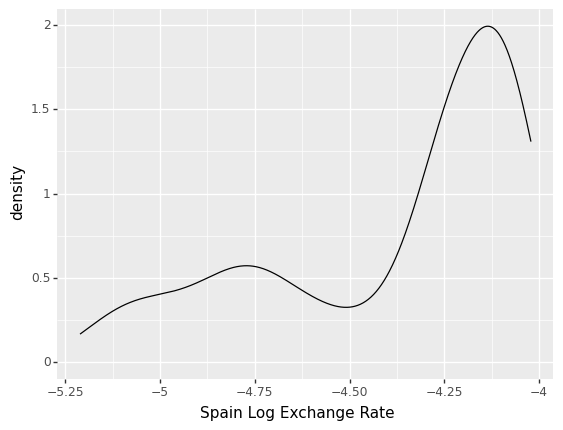

<ggplot: (331764872)>

In [156]:
ggplot(analysis_df, aes(x= 0, y="Spain Log Exchange Rate")) + geom_boxplot()
ggplot(analysis_df, aes(x="Spain Log Exchange Rate")) + geom_density()


# Final Data

In [ ]:
pd.options.display.max_rows = 10 

analysis_df